# Домашнє завдання: Інтерактивні візуалізації з Plotly

## Опис завдання
У цьому домашньому завданні ви будете створювати інтерактивні візуалізації з допомогою бібліотеки Plotly. Ви дізнаєтесь різницю між Plotly Express (швидкі графіки) та Graph Objects (повний контроль), та створите інтерактивний дашборд.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [11]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

# Для plotly краще не встановлювати datetime як індекс
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.day_name()

# Додаємо назви сезонів
season_map = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df['season_name'] = df['season'].map(season_map)

## Завдання 1: Базовий інтерактивний лінійний графік (Plotly Express)

**Завдання:**
Створіть інтерактивний лінійний графік динаміки оренди за часом (рівень деталізації - як в даних) з можливістю zoom та hover.

Дайте відповіді на питання.
**Питання для інтерпретації:**
1. Яка перевага інтерактивного графіка над статичним?
2. Чому на графіку є "пробіли" - ділянки, де одна пряма лінія зʼєднує два "суцільних" блоки з даними? Як би ви це могли дослідити на статичному графіку?


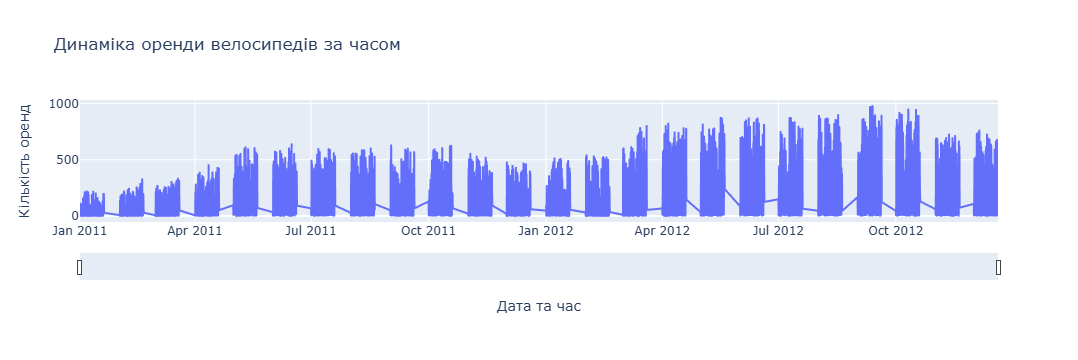

In [4]:
# Побудова інтерактивного лінійного графіка
fig = px.line(df, x='datetime', y='count',
              title='Динаміка оренди велосипедів за часом',
              labels={'datetime': 'Дата та час', 'count': 'Кількість оренд'})

# Налаштування hover і можливості масштабування вже є в Plotly Express за замовчуванням
fig.update_layout(xaxis_rangeslider_visible=True)

# Вивід графіка
fig.show()

**Відповіді на питання**
1. Перевага інтерактивного графіка над статичним у тому, що можна використати зум, щоб дослідити кожен діапазон детальніше. Наведення мишки на конкретну точку, показує дані (дата, час, к-ть оренд). Статичні графіки підходять для звітів, презентацій, де важливо показати дані інтерактивним способом.
2. Пробіли є тому, що після 19 числа кожного місяця відсутні дані. На статичному графіку це побачити можна тоді, коил аналізуємо дані у менших розрізах часових. Не за весь період, а за місяць.

## Завдання 2: Scatter plot з додатковими даними (Plotly Express)

**Завдання:**
Створіть scatter plot кількості орендованих велосипедів випадковими користувачами vs кількості орендованих велосипедів зареєстрованими користувачами. Розмір точок встановіть за сумарною кількістю велосипедів, які були взяті в оренду, а колір - за сезоном. В hover_data - додайте деталі, які допоможуть вам в подальшому аналізі.

Дослідіть графік. Зверніть увагу, що ви можете вмикати і вимикати окремі сезони, якщо будете клікати на колір сезону в легенді графіку.

**Дайте відповідь на питання.**
- Як ви проінтерпретуєте роздвоєність цього графіку (дві явні лінії)? Що це означає?
- Які висновки для компанії, які дає велосипеди в оренду, ви можете зробити з цього графіку? 3 основних висновки.

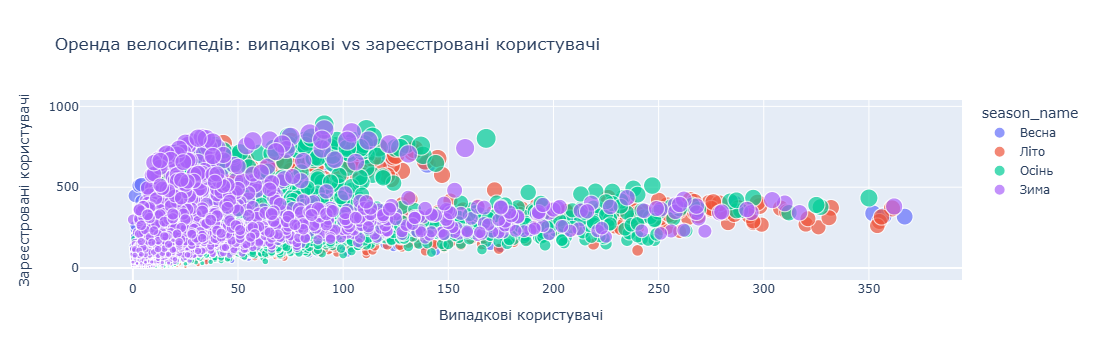

In [6]:
fig = px.scatter(
    df, 
    x='casual', 
    y='registered',
    size='count',
    color='season_name',
    hover_data=['datetime', 'temp', 'humidity', 'windspeed', 'workingday', 'holiday'],
    title='Оренда велосипедів: випадкові vs зареєстровані користувачі',
    labels={'casual': 'Випадкові користувачі', 'registered': 'Зареєстровані користувачі'}
)

fig.show()


**Відповіді на питання:**
1. Дві лінії точок говорять про те, є 2 тенденції. Верхня лінія - велика кількість зареєстрованих користувачів при відносно малій кількості випадкових.
Нижня лінія переважання випадкових користувачів при меншій кількості зареєстрованих.
Тобто, ми можемо прослідкувати наступні тенденції:
- регулярне користування (наприклад, поїздки на роботу) — переважають зареєстровані користувачі.
- епізодичне або туристичне використання (наприклад, у вихідні, в теплу погоду) — переважають випадкові користувачі.

## Завдання 3: Порівняння Plotly Express vs Graph Objects

**Завдання:**
Створіть лінійний графік помісячної динаміки оренди велосипедів двома способами - з Plotly Express та з Graph Objects.

**Дайте відповіді на питання.**
1. Як ви розумієте основну різницю між цими двома підходами?
2. Коли краще використовувати Plotly Express?
3. Коли потрібен Graph Objects?


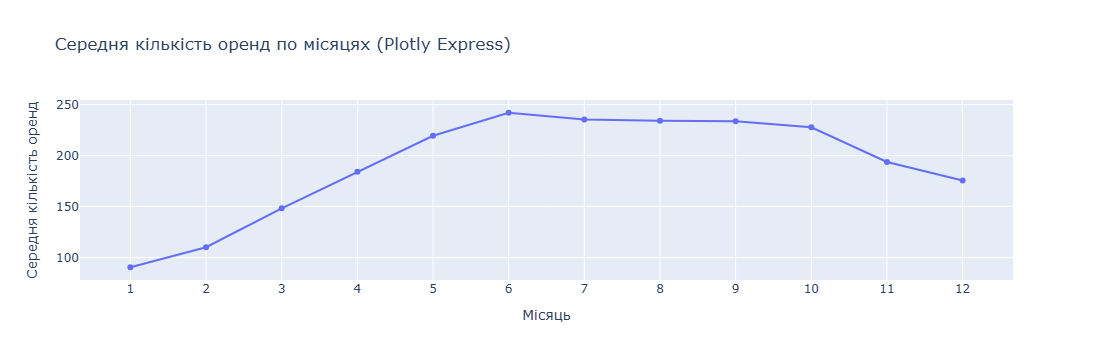

In [7]:
# Групуємо по місяцях
monthly_df = df.groupby('month')['count'].mean().reset_index()

# Лінійний графік з Plotly Express
fig_express = px.line(
    monthly_df,
    x='month',
    y='count',
    title='Середня кількість оренд по місяцях (Plotly Express)',
    labels={'month': 'Місяць', 'count': 'Середня кількість оренд'},
    markers=True
)
fig_express.update_layout(xaxis=dict(dtick=1))  # показувати кожен місяць
fig_express.show()


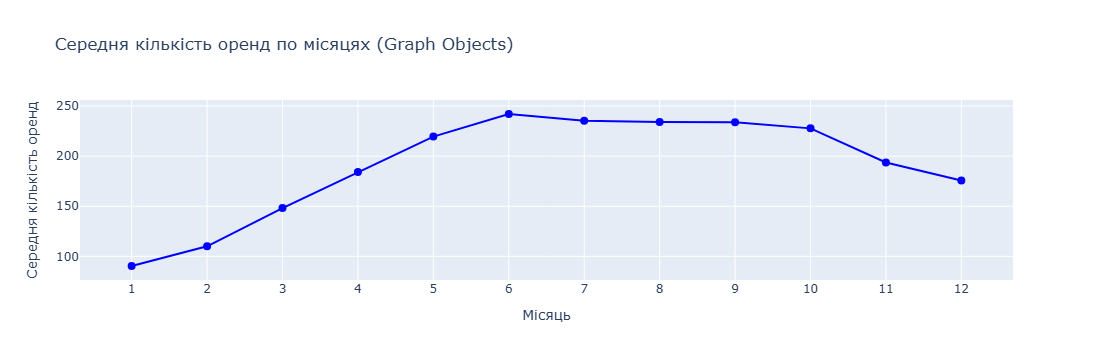

In [8]:
# Використовуємо ті ж самі дані
import plotly.graph_objects as go

fig_graph = go.Figure()

fig_graph.add_trace(go.Scatter(
    x=monthly_df['month'],
    y=monthly_df['count'],
    mode='lines+markers',
    name='Оренди',
    line=dict(color='blue'),
    marker=dict(size=8)
))

fig_graph.update_layout(
    title='Середня кількість оренд по місяцях (Graph Objects)',
    xaxis_title='Місяць',
    yaxis_title='Середня кількість оренд',
    xaxis=dict(dtick=1)
)

fig_graph.show()


**Відповіді на питання:**
1. Plotly Express простий і швидкий спосіб побудуватиграфік, а Graph Objects  складнійший синтаксис, але за його допомогою можна контролювати усі елементи, будувати дашборди тощо.
2. Plotly Express використовуємо коли потрібно швидко побудувати стандартний графік.
Коли немає складної логіки, або коли дані вже готові до візуалізації. Коли потрібно швидко проаналізувати дані.
3.Graph Objects використовуємо, коли  треба комбінувати кілька серій або кілька типів графіків і треба повністю налаштовувати вигляд: кольори, шрифти, лінії, layout, hover тощо. Підходить для фінального оформлення звітів або дашбордів.

## Завдання 4: Дашборд з make_subplots (Graph Objects)

**Завдання:**
Створіть дашборд з 4 різними графіками в одній фігурі:
- Bar chart - середні значення загальної кількості оренд велосипедів за сезонами
- Pie chart - відсоткове співвідношення погодних умов в даних
- Line chart - середнє значення загальної кількості оренд велосипедів за годинами протягом доби
- Scatter plot - кореляція температури vs вологість

Додайте заголовок на дашборд.

**Дайте відповідь на питання**
- На ваш погляд, яка перевага об'єднання графіків в один дашборд?

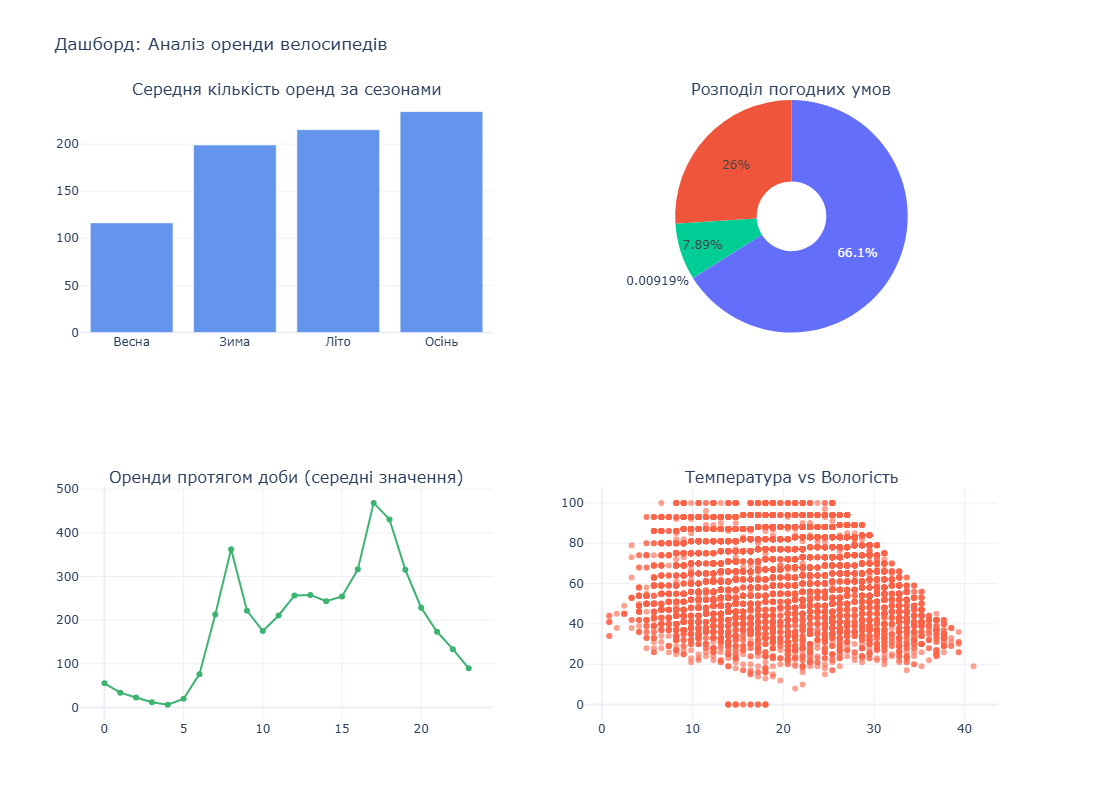

In [26]:
# Bar chart: середнє значення count за сезонами
season_avg = df.groupby('season_name')['count'].mean().reset_index()

# Pie chart: частка кожного типу погоди
weather_counts = df['weather'].value_counts(normalize=True).sort_index()
weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}
weather_labels_list = [weather_labels[i] for i in weather_counts.index]

# Line chart: середнє значення count за годинами доби
hourly_avg = df.groupby('hour')['count'].mean().reset_index()

# Scatter plot: температура vs вологість
temp = df['temp']
humidity = df['humidity']

# Створення підграфіків 
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[
        "Середня кількість оренд за сезонами",
        "Розподіл погодних умов",
        "Оренди протягом доби (середні значення)",
        "Температура vs Вологість"
    ],
    specs=[[{"type": "bar"}, {"type": "domain"}],
           [{"type": "xy"}, {"type": "xy"}]]
)

# Bar chart
fig.add_trace(go.Bar(
    x=season_avg['season_name'],
    y=season_avg['count'],
    marker_color='cornflowerblue',
    name='Оренди за сезонами'
), row=1, col=1)

# Pie chart
fig.add_trace(go.Pie(
    labels=weather_labels_list,
    values=weather_counts.values,
    name='Погода',
    hole=0.3
), row=1, col=2)

# Line chart
fig.add_trace(go.Scatter(
    x=hourly_avg['hour'],
    y=hourly_avg['count'],
    mode='lines+markers',
    name='Оренди за годинами',
    line=dict(color='mediumseagreen')
), row=2, col=1)

# Scatter plot
fig.add_trace(go.Scatter(
    x=temp,
    y=humidity,
    mode='markers',
    name='Temp vs Humidity',
    marker=dict(color='tomato', opacity=0.6)
), row=2, col=2)

# Загальні налаштування
fig.update_layout(
    title="Дашборд: Аналіз оренди велосипедів",
    height=800,
    showlegend=False,
    template='plotly_white'
)

fig.show()
fig.write_html("dashboard_3d_rent.html")

**Відповіді на питання:**
1. Перевагою об'єднання усіх графіків на один дашборд є можлвість комплексного аналізу інформації. Не потрібно переключатись між вікнами і вкладками при презентації результатів дослідження, так як показуємо їх усі разом.
   Стовпчиковий графік показує як змінювалась к-ть оренд по сезонах, лінійний - як змінюється к-ть оренди в залежності від часу доби, кругова діаграма - показує як змінюється к-ть оренд в залежності від погодних умов, точкова діаграма - показує зв'язок між погодою і вологістю.

## Завдання 5: 3D візуалізація

**Завдання:**
Створіть 3D scatter plot для аналізу взаємозв'язку температури, швидкості вітру та загальної кількості орендованих велосипедів. Колір встановіть за сезоном, а розмір - за загальною кількість оренд також.

Дайте відповіді на питання.
**Питання для інтерпретації:**
1. Яку додаткову інформацію, на ваш погляд, дає 3D візуалізація?
2. Чи видно кластери в 3D просторі?
3. Чи ви можете зробити висновки з цієї візуалізації, чи вам було простіше побудувати кілька 2D?



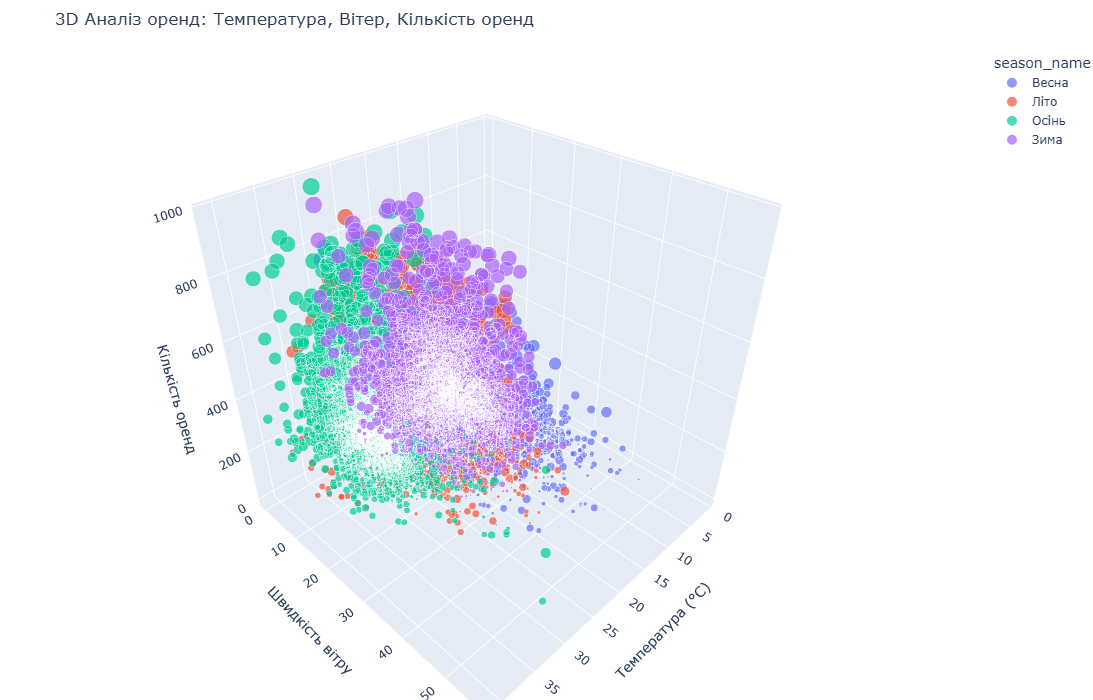

In [19]:
fig = px.scatter_3d(
    df,
    x='temp',
    y='windspeed',
    z='count',
    color='season_name',
    size='count',
    title='3D Аналіз оренд: Температура, Вітер, Кількість оренд',
    labels={'temp': 'Температура (°C)', 'windspeed': 'Швидкість вітру', 'count': 'Кількість оренд'},
    opacity=0.7,
    height=700
)

fig.update_traces(marker=dict(sizemode='area', sizeref=2.*df['count'].max()/(40.**2), line_width=0.5))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=50))
fig.show()


**Відповіді на питання:**

1. Ми можемо одночасно дослідити взаємозв’язок трьох змінних (температура, вітер, кількість оренд). Легко помітити об’ємні скупчення (кластери), які можуть бути менш очевидними в 2D. Можемо легко обертати простір, щоб знайти найзручніший ракурс для аналізу.
2. Так, кластеризація помітна за сезонністю: Зима (фіолетові точки) — концентрується в області низьких температур та середнього вітру, але з високою кількістю оренд.
Весна та осінь мають ширший розкид по температурі та вітру, з помірною кількістю оренд. Літо (червоні точки)  менше представлено, можливо, через менший попит або відсутність даних.
3. 3D зручно для загальної картини та пошуку патернів. Але тоді, коли потрібно провести детальний аналіз краще доповнити 3D кількома 2D-графіками.
Потрібно чітко знати яке питання потрібно дослідити і відштовхуючись від цього приймати рішення про те який саме графік будувати. 3D для огляду та глибокої візуалізації, а 2D для чіткої інтерпретації зв’язків.


## Завдання 6: Експорт та збереження інтерактивних графіків

**Завдання:**
Збережіть побудований раніше дашборд в формат HTML. Також змініть вручну щось на дашборді (зум, виділення частини графіку) і збережіть його як статичне зображення через іконку фотоапарату у формат PNG. Завантажте файли з дашбордом у HTML та PNG (або посилання на них на github) разом з посиланням на цей ноутбук при здачі ДЗ.


In [27]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.
